Epoch 1/40


c:\Users\ANSH KEDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ANSH KEDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.0060 - loss: 4.7187 - val_accuracy: 0.0091 - val_loss: 4.7001
Epoch 2/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.0083 - loss: 4.7017 - val_accuracy: 0.0136 - val_loss: 4.6991
Epoch 3/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.0068 - loss: 4.7005 - val_accuracy: 0.0121 - val_loss: 4.6853
Epoch 4/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.0162 - loss: 4.6754 - val_accuracy: 0.0258 - val_loss: 4.6572
Epoch 5/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.0283 - loss: 4.6467 - val_accuracy: 0.0394 - val_loss: 4.5594
Epoch 6/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.0341 - loss: 4.5520 - val_accuracy: 0.0485 - val_loss: 4.3926
Epoch 7/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.0527 - loss: 4.4474 - val_accuracy: 0.0788 - val_loss: 4.2855
Epoch 8/40
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.0632 - loss: 4.3342 - val_accurac

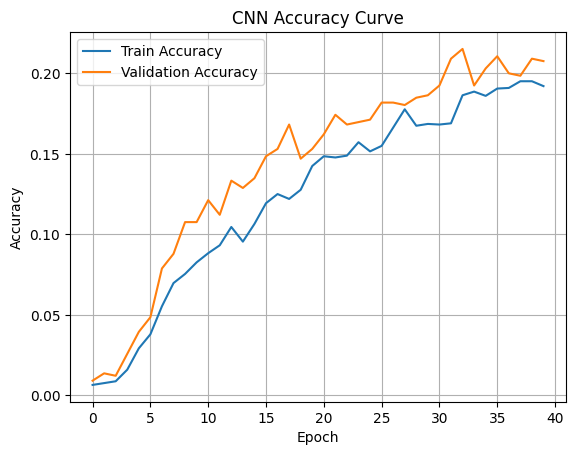

✅ Final Training Accuracy: 41.29%
✅ Final Validation/Test Accuracy: 20.76%


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# --- Configuration ---
DATASET_DIR = 'dataset'  # use your balanced dataset folder
IMG_SIZE = (100, 100)
MODEL_PATH = 'trained_model/cnn_face_model.h5'
LABELS_PATH = 'trained_model/label_classes.npy'
os.makedirs('trained_model', exist_ok=True)

# --- Step 1: Load and Preprocess Images ---
images, labels = [], []
for folder in os.listdir(DATASET_DIR):
    folder_path = os.path.join(DATASET_DIR, folder)
    if not os.path.isdir(folder_path):
        continue
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(folder)

X = np.array(images)
y = np.array(labels)

# --- Step 2: Encode Labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# --- Step 4: Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# --- Step 5: Build CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Step 6: Train Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    validation_data=(X_test, y_test),
    epochs=40,
    callbacks=[early_stop]
)

# --- Step 7: Save Model and Labels ---
model.save(MODEL_PATH)
np.save(LABELS_PATH, le.classes_)

# --- Step 8: Plot Accuracy Curve ---
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# --- Step 9: Evaluate Final Accuracy ---
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Final Validation/Test Accuracy: {test_acc * 100:.2f}%")


In [10]:
# Step 6.1: Evaluate final accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Final Validation/Test Accuracy: {test_acc * 100:.2f}%")


✅ Final Training Accuracy: 41.29%
✅ Final Validation/Test Accuracy: 20.76%
